<h1 style="padding-top: 25px;padding-bottom: 25px;text-align: left; padding-left: 10px; background-color: #DDDDDD; 
    color: black;"> <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2021-s109a/blob/master/lectures/crest.png?raw=true"> CS S109A: Introduction to Data Science </h1>

## Homework 1: Data Collection - Web Scraping - Data Parsing

**Harvard University**<br/>
**Summer 2021**<br/>
**Instructor**: Kevin Rader



<hr style='height:2px'>

In [2]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

<div class='exercise'><b>Instructions</b></div>
- To submit your assignment follow the instructions given in Canvas.
- The deliverables to be submitted in Canvas are: <br/>
    a) this python notebook with your code and answers<br/>
    b) the bibtex file, `publist.bib`, you created<br/>
    c) the CSV file, `publist.csv`, you created <br/>
    d) The JSON file, `publist.json` you created<br/>
    
- Exercise **responsible scraping**. Web servers can become slow or unresponsive if they receive too many requests from the same source in a short amount of time. Use a delay of several seconds between requests in your code. This helps to prevent you from getting blocked by the target website. Run the webpage fetching part of the homework only once and do not re-run after you have saved the results in the JSON file (details below). 
- Web scraping requests can take several minutes. This is another reason why you should not wait until the last minute to do this homework.



# Data Collection - Web Scraping - Data Parsing 
 

In this homework, your goal is to learn how to acquire, parse, clean, and analyze data. Initially you will read the data from a file, and then later scrape them directly from a website. You will look for specific pieces of information by parsing the data, clean the data to prepare them for analysis, and finally, answer some questions.

In doing so you will get more familiar with three of the common file formats for storing and transferring data, which are:
- CSV, a text-based file format used for storing tabular data that are separated by some delimiter, usually comma or space.
- HTML/XML.
- JavaScript Object Notation (JSON), a text-based open standard designed for transmitting structured data over the web.

In [3]:
# import the necessary libraries
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
%matplotlib inline

## Help a professor parse their publications and extract information.

### Overview

In this part your goal is to parse the HTML page of a professor containing some of his/her publications, and answer some questions. This page is provided to you in the file `data/publist_super_clean.html`. There are 45 publications in descending order from No. 244 to No. 200.


In [4]:
# use this file 
PUB_FILEPATH = 'data/publist_super_clean.html'

<div class='exercise'><b> Question 1 [35 pts]: Parsing and Converting to bibTex and CSV using Beautiful Soup and python string manipulation </b></div>

A lot of the bibliographic and publication information is displayed in various websites in a not-so-structured HTML files. Some publishers prefer to store and transmit this information in a .bibTex file which looks roughly like this (we've simplified a few things):
```
@article { 
     author = "John Doyle",
     title = "Interaction between atoms",
     URL = "Papers/PhysRevB_81_085406_2010.pdf",
     journal = "Phys. Rev. B",
     volume = "81"
}
```
You will notice that this file format is a set of items, each of which is a set of key-value pairs. In the python world, you can think of this as a list of dictionaries.
Each line is an item, and has multiple features, or keys, as represented by that line's value for the column corresponding to the key.

You are given an .html file containing a list of papers scraped from the author's website and you are to write the information into .bibTex and .CSV formats. A useful tool for parsing HTML is BeautifulSoup  (http://www.crummy.com/software/BeautifulSoup/) (BS).

**1.1 [5 pts]** Write a function called `make_soup` that accepts `filename` for the HTML filename as an input and returns a BS object.
    
**1.2 [20 pts]** Write a function that reads in the BS object, parses it, and converts it into a list of dictionaries.  Each element of this list should cerrespond to one paper and should have the following format (with different values for each publication):
```
{'author': 'L.A. Agapito, N. Kioussis and E. Kaxiras',
 'title': 'Electric-field control of magnetism in graphene quantum dots:\n Ab initio calculations',
 'URL': 'Papers/PhysRevB_82_201411_2010.pdf',
 'journal': 'Phys. Rev. B',
 'volume': '82'}
```


**1.3 [5 pts]** Convert the list of dictionaries into standard .bibTex format using python string manipulation, and write the results into a file called `publist.bib`.

**1.4 [5 pts]** Convert the list of dictionaries into standard tabular .csv format using pandas, and write the results into a file called `publist.csv`. The csv file should have a header and no integer index.

    
#### HINT 
- Inspect the HTML code for tags that indicate information chunks such as `title` of the paper.  BeautifulSoup's `find_all` method might be useful.
- Question 1.2 is better handled if you break the code into functions, each performing a small task such as finding the author(s) for each paper. 
- Question 1.3 is effectively tackled by first using python string formatting on a template string.
- Make sure you catch exceptions when needed. 
- Make sure you check for **missing data** and handle these cases as you see fit. 


#### Resources
- [BeautifulSoup Tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/).
- More about the [BibTex format](http://www.bibtex.org).<BR>
    
### Answers 

In [5]:
# import the necessary libraries 
from bs4 import BeautifulSoup

 **1.1** Write a function called `make_soup` that accepts as input a string representing the path to an HTML file and returns a BS object.
    

In [6]:
def make_soup(file_path: str) -> BeautifulSoup: 
    
    '''Open the file and convert into a BS object. 
       
       Args:
           file_path: (str) path to an HTML file
       
       Returns:
           A BS object containing the HTML page ready to be parsed.
    '''
    return BeautifulSoup(open(file_path).read(), 'html.parser')

soup = make_soup(PUB_FILEPATH)

In [7]:
# check your code - print the BS object returned by `make_soup()`
# you should get a familiar HTML page as text (please enable scrolling on the output)
print(soup)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efth

Your output should look **like** this:
```
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  035325 (2011)
<br/>
</li>
</ol>

...

```

In [8]:
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">
<title>
 Kaxiras E journal publications
</title>
<head>
 <meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
 <link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
 <meta content="" name="description"/>
 <meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
 <ol start="244">
  <li>
   <a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
    "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"
   </a>
   <br/>
   Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
   <i>
    PHYSICAL REVIEW B
   </i>
   <b>
    84
   </b>
   ,  125411 (2011)
   <br/>
  </li>
 </ol>
 <ol start="243">
  <li>
   <a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
    "Effect of symmetry breaking on the optica

**1.2** Write a function that reads in the BS object, parses it, and converts it into a list of dictionaries.  Each element of this list should correspond to one paper and should have the following format (with different values for each publication):
```
{'author': 'L.A. Agapito, N. Kioussis and E. Kaxiras',
 'title': 'Electric-field control of magnetism in graphene quantum dots:\n Ab initio calculations',
 'URL': 'Papers/PhysRevB_82_201411_2010.pdf',
 'journal': 'Phys. Rev. B',
 'volume': '82'}
```

In [11]:
#1.2

def get_publications(soup):
    soup_list = soup.select("ol li")
    keys = ["author", "title", "url", "journal", "volume"]
    authors = ["".join(paper.br.next_sibling.string.splitlines()).strip(" ,") for paper in soup_list]
    titles = ["".join(paper.a.string.splitlines()).strip("\"") if paper.a.string else paper.a.get_text().strip("\n\"") for paper in soup_list]
    urls = [paper.a["href"] for paper in soup_list]
    journals = [paper.select("i")[-1].string.strip() for paper in soup_list]
    volumes = [paper.b.string if paper.b else "" for paper in soup_list]
    return [dict(zip(keys, [authors[i], titles[i], urls[i], journals[i], volumes[i]])) for i in range(len(soup_list))]


papers = get_publications(soup)

In [12]:
# your code here
papers

[{'author': 'Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng',
  'title': 'Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons',
  'url': 'Papers/2011/PhysRevB_84_125411_2011.pdf',
  'journal': 'PHYSICAL REVIEW B',
  'volume': '84'},
 {'author': 'JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng',
  'title': 'Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles',
  'url': 'Papers/2011/PhysRevB_84_035325_2011.pdf',
  'journal': 'PHYSICAL REVIEW B',
  'volume': '84'},
 {'author': 'Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras',
  'title': 'Influence of CH2 content and network defects on the elastic properties of organosilicate glasses',
  'url': 'Papers/2011/PhysRevB_83_054204_2011.pdf',
  'journal': 'PHYSICAL REVIEW B',
  'volume': '83'},
 {'author': 'Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsiang-Han Tseng, Adam Gali',
  'title': 'Direct correlat

**1.3** Convert the list of dictionaries into standard .bibTex format using python string manipulation, and write the results into a file called `publist.bib`.


In [13]:
# 1.3:

from string import Template
template_string = """
@article {
    author =$author
    title =$title
    url=$url
    journal=$journal
    volume=$volume    
} """
#
template_object = Template(template_string)


In [14]:
with open('publist.bib', 'a') as f:
    for paper in papers:
        f.write(template_object.substitute(author=paper["author"],title=paper["title"], url=paper["url"], journal=paper["journal"], volume=paper["volume"]))


In [15]:
# check your answer - print the bibTex file
# clear/remove output before making pdf
with open('publist.bib', 'r') as f:
    print(f.read())


@article {
    author =Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng
    title =Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons
    url=Papers/2011/PhysRevB_84_125411_2011.pdf
    journal=PHYSICAL REVIEW B
    volume=84    
} 
@article {
    author =JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng
    title =Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles
    url=Papers/2011/PhysRevB_84_035325_2011.pdf
    journal=PHYSICAL REVIEW B
    volume=84    
} 
@article {
    author =Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras
    title =Influence of CH2 content and network defects on the elastic properties of organosilicate glasses
    url=Papers/2011/PhysRevB_83_054204_2011.pdf
    journal=PHYSICAL REVIEW B
    volume=83    
} 
@article {
    author =Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsiang-Han Tseng, Adam Gali
    title =Direct cor

**1.4** Convert the list of dictionaries into standard tabular .csv format using pandas, and write the results into a file called `publist.csv`. The csv file should have a header and no integer index.

In [16]:
# your code here
import csv

keys = papers[0].keys()
with open('people.csv', 'w', newline='')  as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(papers)

## Follow the stars in IMDb's list of "The Top 100 Stars for 2020" 

### Overview
In this part, your goal is to extract information from IMDb's Top 100 Stars for 2020 (https://www.imdb.com/list/ls045252306/) and perform some analysis on each star in the list. In particular we are interested to know: 
+ how many performers made their first acting appearance after turning 25? 
+ how many performers started as child actors? (i.e., strictly younger than 12)
+ who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2020? 

These questions are addressed in more details in the questions below. 



<div class='exercise'><b> Question 2 [65 pts]: Web Scraping using Beautiful Soup and exploring using Pandas </b></div>

**2.1 [5 pts]** Download the webpage of the "Top 100 Stars for 2020" (https://www.imdb.com/list/ls082599715/) into a `requests` object and name it `my_page`. Explain what the following attributes are (1 or 2 sentences for each):

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.

**2.2 [5 pts]** Create a Beautiful Soup object named `star_soup` using `my_page` as input.

**2.3 [15 pts]** Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below). The order of dictionaries does not matter. One of the fields of this dictionary is the `url` of each star's individual page, which you need to save in the `page` field. Note that there is a ton of information about each star on these webpages. Each dictionary corresponds to a star profile and it should have the following data:

```
name: the name of the actor/actress as it appears at the top
gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
url: the url of the link under their name that leads to a page with details
page: BS object with html text acquired by scraping the above 'url' page' 
```


**2.4 [20 pts]** Write a function called `create_star_table`, which takes `starlist` as an input and extracts information about each star (see function definition for the exact information to be extracted and the exact output definition).  Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.

   
**2.6 [6 pts]** We provide a JSON file called `data/staff_starinfo_2020.json` created by CS109 teaching staff for consistency, which you should use for the rest of the homework. Import the contents of this JSON file  into a pandas dataframe called `frame`. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made their first appearance, movie or TV, (name this column `age_at_first_appearance`). Check some of the values of this new column. Do you find any problems? You don't need to fix them.

**2.7 [4 pts]** You are now ready to answer the following intriguing questions: 
- **2.7.1** How many performers made their first appearance (movie or TV) when they were 25 years old or older?

- **2.7.2** How many performers started as child actors? Define child actor as a person strictly younger than 12 years old. 

**2.8 [6 pts]** Use your Python visualization skills to further explore the data:
- **2.8.1** Create 2 scatter plots: one showing the relationship between age at first appearance and number of credits, the other between year born and number of credits. What can you say about these relationships? Are there any apparent outliers? Please limit your written responses to 4 sentences or fewer.
- **2.8.2** Create 2 histograms in a single plot comparing the distribution of actors' current ages to actresses' current ages. What does this visualization tell you? (4 sentences or fewer)
- **2.8.3** Create a box plot comparing the credits-per-year-active for actors and actresses. Here we assume all stars in the list are still active. Do these distributions look the same across genders? Comment on anything else of interest gleaned from your plot. (4 sentences or fewer)

**2.9 [2 pts]** Make a plot of the number of credits against the name of actor/actress. Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2020? Define **most prolific** as the performer with the most credits.
    
**2.10 [2 pts]** In 4 or fewer sentences, comment on what you see in the plots above.  Are there any surprises or patterns?  Please **have some fun** with this question.
     
### Hints
- You should include acting appearances in both movies and TV shows.
- Create a variable that groups actors/actresses by the age of their first appearance. Use pandas' `.groupby` to divide the dataframe into groups of performers that for example started performing as children (age $<$ 12). The grouped variable is a `GroupBy` pandas object and this object has all of the information needed to then apply operations to each of the groups.
- When cleaning the data make sure the variables with which you are performing calculations are in numerical format.
- The column with the year may have some values that are double, e.g. **'2000-2001'** and the column with age has some empty cells. You need to deal with these in a reasonable fashion before performing calculations on the data. 
- Rita Aryu was born in 1993.
- Be careful of some actors/actresses listings as producers.  We only want their acting appearances.
- Christopher Nolan is mainly a writer and has never acted.  Be careful handling him (you should 'impute' the year of his first movie appearance as 2021).
    
### Resources
- The `requests` library makes working with HTTP requests easy. For more on the `requests` library see http://docs.python-requests.org/

### Answers

In [17]:
import requests
import re # you may use regexes but they are not required

**2.1** Download the webpage of the "Top 100 Stars for 2020" (https://www.imdb.com/list/ls082599715/) into a `requests` object and name it `my_page`. Explain what the following attributes are:

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.


In [18]:
# your code here
top100_URL = "https://www.imdb.com/list/ls082599715/"
my_page = requests.get(top100_URL)


*Kvalsvik's answer:*
- my_page.text gives the html text of the website as string.
- my_page.status_code gives the servers response from the request which in this case is 200 and tells us that loading the page was a success.
- my_page.content gives more of the HTML formatting. The data type here is bytes in contrast to the .text string type.



**2.2** Create a Beautiful Soup object named `star_soup` using `my_page` as input.


In [19]:
# your code here
from bs4 import BeautifulSoup

star_soup = BeautifulSoup(my_page.text, 'html.parser' )
type(star_soup)

bs4.BeautifulSoup

In [20]:
# check your code - you should see familiar HTML code
print (star_soup.prettify()[:])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///list/ls082599715?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Top 100 Stars of 2020 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {w

**2.3** Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below)....

```
Function
--------
parse_stars

Input
------
star_soup: the soup object with the scraped page
   
Returns
-------
a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    name: the name of the actor/actress as it appears at the top
    gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
    url: the url of the link under their name that leads to a page with details
    page: BS object with 'html text acquired by scraping the above 'url' page' 

```

In [22]:
# First a separate if function to put in the parse_stars:
def genderfunc(i):
    if "Actress" in i.find("p" ,class_="text-muted").text: return 1
    elif "Actor" in i.find("p" ,class_="text-muted").text: return 0
    else: ""

# A list of dictionaries; each dictionary corresponds to a star profile:        
def parse_stars(input):
    top100_list = star_soup.find_all("div", class_="lister-item mode-detail")
    keys = ['name', 'gender', 'url', 'page']
    names = [i.img['alt'] for i in top100_list]
    genders = [genderfunc(i) for i in top100_list] 
    urls = ["https://www.imdb.com"+i.a['href'] for i in top100_list] 
    page = [BeautifulSoup(requests.get(i).content, 'html.parser') for i in urls]
    return [dict(zip(keys, [names[i], genders[i], urls[i], page[i]])) for i in range(len(top100_list))] 

starlist = parse_stars(star_soup)

This should give you 100

In [23]:
print(len(starlist))

100


In [25]:
# check your code
# this list is large because of the html in the `page` field
# to get a better picture, print only the first element
starlist[0]

{'name': 'Ana de Armas',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm1869101/',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm1869101?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <title>Ana de Armas - IMDb</title>
 <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <script>
     if (typeof uet == 'function') {
       uet("be", "LoadTitle", {wb: 1});
     }
 </script>
 <script>
     if 

Your output should look like this:
```
{'name': 'Ana de Armas',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm1869101',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm1869101?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <title>Ana de Armas - IMDb</title>
 <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
... 


 ```

**2.4** Write a function called `create_star_table`, which takes `starlist` as an input and extracts information about each star (see function definition for the exact information to be extracted and the exact output definition).  Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.

```
Function
--------
create_star_table

Input
------
the starlist
   
Returns
-------

a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    star_name: the name of the actor/actress as it appears at the top
    gender: 0 or 1 (1 for 'actress' and 0 for 'actor')  
    year_born : year they were born
    first_appearance: title of their first movie or TV show
    year_first_appearance: the year they made their first movie or TV show
    credits: number of movies or TV shows they have acted in in their career.
    
```

In [28]:
#helperfunction for credits
def findCredits(stard):
    x = stard["page"]
    x = x.find('div', attrs={"onclick":"toggleFilmoCategory(this);"})
    x = str(x)
    x = int(re.findall("\d+ credits", x)[0].split()[0])
    return x


# Main function:
def create_star_table(input):
    keys = ["star_name", "gender", "year_born", "year_first_appearance", "credits"] #"first_appearance",
    starname = [ i['name'] for i in starlist]   
    genders = [ i['gender'] for i in starlist] 
    year_born = [i['page'].time["datetime"][:4] if i['page'].time else [""] for i in starlist] #elif i['name']=='Ritu Arya' "1993"    
    first_appearance = [i['page'].find('div', attrs={"class":"filmo-category-section"}).find_all("b")[-1].text for i in starlist]
    year_first_appearance = [re.findall("[12][90]\d{2}",i['page'].find('div', attrs={"class":"filmo-category-section"}).find_all("span", class_="year_column")[-1].text.strip("\n")) for i in starlist]
    year_first_appearance =[y[0] if len(y) > 0 else "" for y in year_first_appearance ]
    credits = [findCredits(i) for i in starlist]    

    return [dict(zip(keys, [starname[i], genders[i], year_born[i], first_appearance[i], year_first_appearance[i] , [credits[i]]] )) for i in range(len(starlist))]  #add  when 93 issue is fixed


In [29]:
# DO NOT RERUN THE HTTP REQUESTS TO IMDb WHEN SUBMITTING - THIS WILL TAKE SOME TIME
star_table = create_star_table(starlist)

In [30]:
# check your code
star_table

[{'star_name': 'Ana de Armas',
  'gender': 1,
  'year_born': '1988',
  'year_first_appearance': 'Una rosa de Francia',
  'credits': '2006'},
 {'star_name': 'Julia Garner',
  'gender': 1,
  'year_born': '1994',
  'year_first_appearance': 'The Dreamer',
  'credits': '2010'},
 {'star_name': 'Anya Chalotra',
  'gender': 1,
  'year_born': '1996',
  'year_first_appearance': 'Wanderlust',
  'credits': '2018'},
 {'star_name': 'Millie Bobby Brown',
  'gender': 1,
  'year_born': '2004',
  'year_first_appearance': 'Once Upon a Time in Wonderland',
  'credits': '2013'},
 {'star_name': 'Erin Moriarty',
  'gender': 1,
  'year_born': '1994',
  'year_first_appearance': 'One Life to Live',
  'credits': '2010'},
 {'star_name': 'Margot Robbie',
  'gender': 1,
  'year_born': '1990',
  'year_first_appearance': 'City Homicide',
  'credits': '2008'},
 {'star_name': 'Aidan Gallagher',
  'gender': 0,
  'year_born': '2003',
  'year_first_appearance': 'En moderne familie',
  'credits': '2013'},
 {'star_name': 'A

Your output should look like this (the order of elements is not important):
```
[{'name': 'Ana de Armas',
  'gender': 1,
  'year_born': '1988',
  'first_appearance': 'Una rosa de Francia',
  'year_first_appearance': '2006',
  'credits': '31'},
 {'name': 'Julia Garner',
  'gender': 1,
  'year_born': '1994',
  'first_appearance': 'The Dreamer',
  'year_first_appearance': '2010',
  'credits': '31'},
    ...
```

**2.5** Now that you have scraped all the info you need, it's good practice to save the last data structure you created to disk. Save the data structure to a JSON file named `starinfo.json` and submit this JSON file in Canvas. If you do this, if you have to restart, you won't need to redo all the requests and parsings from before.


In [31]:
import json # investivate the `dump` method

In [32]:
#2.5
with open("starinfo.json", "w") as fd:
    json.dump(star_table, fd)

To check your JSON saving, re-open the JSON file and reload the code

In [33]:
with open("starinfo.json", "r") as fd:
    star_table = json.load(fd)
    
# output should be the same
star_table

[{'star_name': 'Ana de Armas',
  'gender': 1,
  'year_born': '1988',
  'year_first_appearance': 'Una rosa de Francia',
  'credits': '2006'},
 {'star_name': 'Julia Garner',
  'gender': 1,
  'year_born': '1994',
  'year_first_appearance': 'The Dreamer',
  'credits': '2010'},
 {'star_name': 'Anya Chalotra',
  'gender': 1,
  'year_born': '1996',
  'year_first_appearance': 'Wanderlust',
  'credits': '2018'},
 {'star_name': 'Millie Bobby Brown',
  'gender': 1,
  'year_born': '2004',
  'year_first_appearance': 'Once Upon a Time in Wonderland',
  'credits': '2013'},
 {'star_name': 'Erin Moriarty',
  'gender': 1,
  'year_born': '1994',
  'year_first_appearance': 'One Life to Live',
  'credits': '2010'},
 {'star_name': 'Margot Robbie',
  'gender': 1,
  'year_born': '1990',
  'year_first_appearance': 'City Homicide',
  'credits': '2008'},
 {'star_name': 'Aidan Gallagher',
  'gender': 0,
  'year_born': '2003',
  'year_first_appearance': 'En moderne familie',
  'credits': '2013'},
 {'star_name': 'A

**2.6** We provide a JSON file called `data/staff_starinfo_2020.json` created by CS109 teaching staff for consistency, which you should use for the rest of the homework. Import the contents of this JSON file into a pandas dataframe called `frame`. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made their first appearance, movie or TV, (name this column `age_at_first_appearance`). Check some of the values of this new column. Do you find any problems? You don't need to fix them.

In [34]:
#2.6
import pandas as ps

frame = ps.read_json('data/staff_starinfo_2020.json')
frame.head()

,name,gender,year_born,first_movie,year_first_movie,credits
0,Ana de Armas,1,1988,Una rosa de Francia,2006,31
1,Julia Garner,1,1994,The Dreamer,2010,31
2,Anya Chalotra,1,1996,Wanderlust,2018,6
3,Millie Bobby Brown,1,2004,Once Upon a Time in Wonderland,2013,16
4,Erin Moriarty,1,1994,One Life to Live,2010,24


In [35]:
print(frame.dtypes) 
print("""

Types are reasonable as we would expect integers and object for each of these variables respectively""")

name                object
gender               int64
year_born            int64
first_movie         object
year_first_movie     int64
credits              int64
dtype: object


Types are reasonable as we would expect integers and object for each of these variables respectively


In [36]:
frame.shape
frame.describe() 

,gender,year_born,year_first_movie,credits
count,100.000000,100.000000,100.000000,100.000000
mean,0.610000,1984.070000,2002.420000,43.240000
std,0.490207,11.088492,10.389564,36.657332
min,0.000000,1933.000000,1966.000000,0.000000
25%,0.000000,1978.750000,1995.750000,25.000000
50%,1.000000,1985.500000,2004.500000,35.500000
75%,1.000000,1992.000000,2010.000000,56.000000
max,1.000000,2004.000000,2021.000000,312.000000


In [37]:
print("There are no missing values in our dataframe.")

There are no missing values in our dataframe.


In [38]:
frame['age_at_first_appearance'] = frame.year_first_movie-frame.year_born
frame.head(10)

,name,gender,year_born,first_movie,year_first_movie,credits,age_at_first_appearance
0,Ana de Armas,1,1988,Una rosa de Francia,2006,31,18
1,Julia Garner,1,1994,The Dreamer,2010,31,16
2,Anya Chalotra,1,1996,Wanderlust,2018,6,22
3,Millie Bobby Brown,1,2004,Once Upon a Time in Wonderland,2013,16,9
4,Erin Moriarty,1,1994,One Life to Live,2010,24,16
5,Margot Robbie,1,1990,City Homicide,2008,40,18
6,Aidan Gallagher,0,2003,Modern Family,2013,8,10
7,Anya Taylor-Joy,1,1996,Vampire Academy,2014,29,18
8,Linda Cardellini,1,1975,Bone Chillers,1996,67,21
9,Henry Cavill,0,1983,Vendetta,2001,27,18


Answer:   
In the display above we can see the new variable showing the age of actors at their debus. Christopher Nolans age of first appearance is listed as 51 (first performance set to 2021) and this is an outlier compared to the other registrations (even though he is correctly listed with 0 acting credits). We should consider removing this value from the set before performing analysis of perameters related to actors first performances. 

**2.7** You are now ready to answer the following intriguing questions:
- **2.7.1** How many performers made their first appearance (movie or TV) when he/she was 25 years old or older?
- **2.7.2** How many performers started as child actors? Define child actor as a person strictly younger than 12 years old. 


In [39]:
## Answer to question 2.7.1

debut_over_25 = sum(frame['age_at_first_appearance']>=25)
print("The number of performers on the IMDB top 100 list that made their first appearance at the age of 25 years or older is",debut_over_25)

The number of performers on the IMDB top 100 list that made their first appearance at the age of 25 years or older is 9


In [40]:
## Answer to question 2.7.2

debut_under_12 = sum(frame['age_at_first_appearance']<12)
print("The number of performers on the IMDB top 100 list who started their career as child actors is",debut_under_12)

The number of performers on the IMDB top 100 list who started their career as child actors is 17


**2.8** Use your Python visualization skills to further explore the data:
- **2.8.1** Create 2 scatter plots: one showing the relationship between age at first appearance and number of credits, the other between year born and number of credits. What can you say about these relationships? Are there any apparent outliers? Please limit your written responses to 4 sentences or fewer.
- **2.8.2** Create 2 histograms in a single plot comparing the distribution of actors' current ages to actresses' current ages. What does this visualization tell you? (4 sentences or fewer)
- **2.8.3** Create a box plot comparing the credits-per-year-active for actors and actresses. Here we assume all stars in the list are still active. Do these distributions look the same across genders? Comment on anything else of interest gleaned from your plot (4 sentences or fewer).

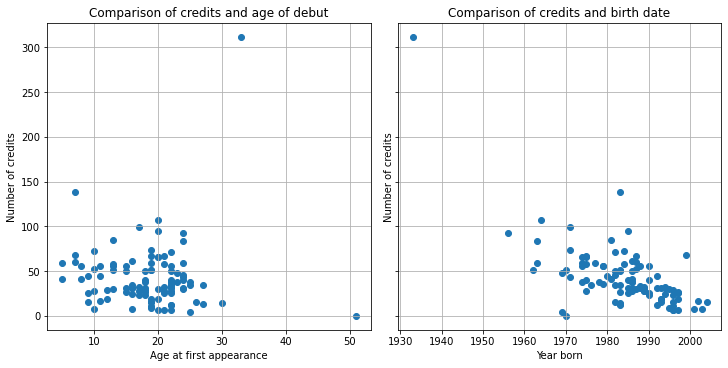

In [41]:
# 2.8.1

fix, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,5), constrained_layout=True)

ax[0].grid()
ax[0].scatter(frame['age_at_first_appearance'],frame['credits'])
ax[0].set_ylabel("Number of credits")
ax[0].set_xlabel("Age at first appearance")
ax[0].set(title="Comparison of credits and age of debut")

ax[1].grid()
ax[1].scatter(frame['year_born'],frame['credits'])
ax[1].set_ylabel("Number of credits")
ax[1].set_xlabel("Year born")
ax[1].set(title="Comparison of credits and birth date")
             
plt.show()



#### 2.8.2 
###### Outliers: 
Fred Willard is a valid outlier with his exceptional number of credits, while Christopher Nolan is a false registration from his computed age of first appearance.   
###### Relationships: 
I do not visually see a relationship between credits and age of debut, however there seems to be a negative relationship between credits and year born. This makes sense because older performers have had more time to assemble credits. 

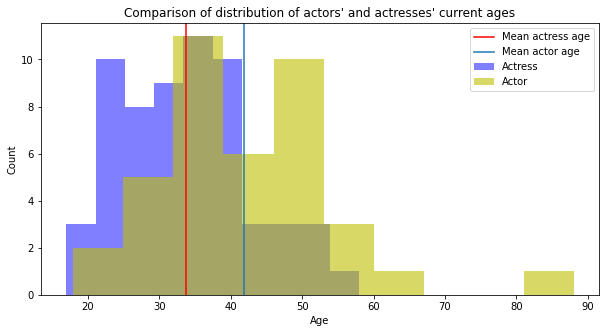

In [42]:
# 2.8.2
# print(frame[frame.gender == 1]["age"].describe())  #Mean age actresses = 33.77
# print(frame[frame.gender == 0]["age"].describe())    #Mean age actresses = 41.87

frame['age'] = 2021 - frame['year_born']
frame['gender']==1

fig, ax = plt.subplots(figsize=(10,5))

ax.hist(frame[frame.gender == 1]["age"], bins=10, alpha=0.5, color="b", label='Actress')
ax.hist(frame[frame.gender == 0]["age"], bins=10, alpha=0.6, color="y", label='Actor')
ax.axvline(x=33.77, color='r', label='Mean actress age')
ax.axvline(x=41.87, label='Mean actor age')
ax.set_title("Comparison of distribution of actors' and actresses' current ages")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.legend()

plt.show()


#### 2.8.2

Both distributions have resemblence to a bell-shape, and for actors we can see a right tail caused by the older outlier Fred Willard. We can also see that the mean age for actresses on IMDB's top 100 list is significantly lower than the mean age for actors. 

AttributeError: 'AxesSubplot' object has no attribute 'test'

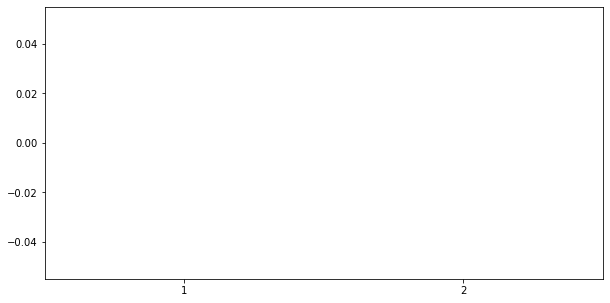

In [43]:
# 2.8.3

frame['years_active'] = frame['age'] - frame['age_at_first_appearance']
#feeds into this variable which is our Y:
frame['credits_per_year_active'] = frame['credits'] / frame['years_active']

fig, ax = plt.subplots(figsize=(10,5))

actresses = frame[frame.gender == 'Female']['credits_per_year_active']
actors = frame[(frame.gender == 'Male') & (frame.name != 'Christopher Nolan')]['credits_per_year_active']
colors = ['pink', 'lightblue']

boxplot = ax.boxplot([actresses, actors], vert=True, patch_artist=True)
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
ax.test(x=1, y=5.5, s="Lauren Lapkus")
ax.test(x=2, y=5.25, s="Fred Willard")        
ax.set_xticklabels(['Actresses', 'Actors'])
ax.set_ylabel('Observed Values')
ax.yaxis.grid(True)

##### 2.8.3
There seems to be a relationship where the number of credits obtained per active year is higher for actresses than for actors. This might be caused by the fact that actors on our top 100 list stay active for a longer period on average. 

**2.9** Make a plot of the number of credits against the name of actor/actress. Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2020? Define **most prolific** as the performer with the most credits. 

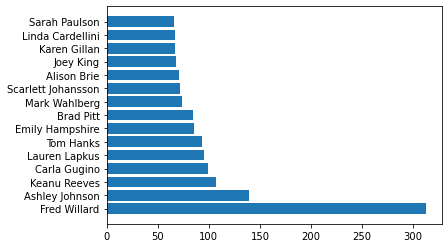

Fred Willard is the most prolific actor in IMDb's list of Top 100 Stars


In [45]:
#2.9
sorted_prolific = frame.sort_values(by='credits', ascending=False).iloc[0:15]
# Chose to display the 15 most prolific actors since there displaying more will lead to unnecessary clutter.

fix, ax = plt.subplots()

ax.barh(sorted_prolific['name'], sorted_prolific['credits'])
plt.show()

print("Fred Willard is the most prolific actor in IMDb's list of Top 100 Stars")

**2.10** In 4 or fewer sentences, comment on what you see in the plots above.  Are there any surprises or patterns?  Please **have some fun** with this question.

### 2.10
Interesting takeaways from these statistics are that only about 3% of actors on the IMDb's top 100 list have made their debut after the age of 30. Still there is not a significant relationship between the age of debus and the number of credits of an actor on the Top 100 list. 
